# MATH 105 LA

### Homework: due Thursday 10/08/2015

Please list the name of your collaborators 

You will be asked to fill the body of the functions. To make my life (and therefore yours) easier please respect the imput and output of every function. The homework will be graded using a script that test your functions (using the name, input and output I provided here) in a automated fashion.



## Question 1: Numerical evaluation of $e^x$ 

You saw last time that trying to evaluate $e$, the Euler's number, by a well known limit didn't work well due to finite precision arithmetics and round-off problems. In this question you will write a function to compute $e$ in a stable manner.  

We will use a truncated Taylor series of $e^x$ around 0.

Q1.a Write a small function that takes an integer nTerms, and gives back the approximation of $e$ via a truncated Taylor series with nTerms.

In [1]:
function evalExponential(Nterms::Int)
    approxE,factorial  = (1,1);
    for ii = 1:Nterms-1 
        approxE += 1.0/(factorial *= ii)
    end
    return approxE
end

evalExponential (generic function with 1 method)

Test your code by running

In [2]:
evalExponential(10)-e

-3.0288585284310443e-7

You should see that the result of your function converges fast as you increse the nTerms. Now run your code using the snippet below to observe the convergence rate.
We first load the plotting library Gadfly.

In [3]:
using Gadfly

We compute the relative error for different number of terms and we plot it in semilog scale.

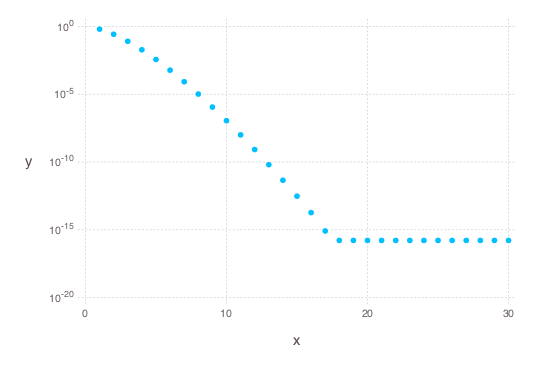

In [4]:
nPlot = 30
# shortcut for
# Error = zeros(nPlot,1)
# for ii = 1:nPlot
#     Error[i] = abs(evalExponential(ii) -e)/e
# end
Error = {abs(evalExponential(ii) -e)/e for ii=1:nPlot} 
# plotting the error, x and y need to have the same lenght
plot(x = 1:nPlot, y = Error, Scale.y_log10)

Can you comment, based on the truncation error of the Taylor series, why do you see this convergence ratio?

Answer: From the taylor approximation we can observe that the error behaves like $~ 1/n!$, i.e., the error has a factorial convergence rate. Using the Stirling formula we have that the error behaves like $e^{-n\log{n}}$, which explains the concavity of the error curve, up to $10^{-15}$ which is the epsilon machine. 

Q1.b: In practice, we do not the exact answer, so we want to know a priori how many terms we need to obtain certain accuracy. In this case you can easily check the theoretical accuracy using the reminder term in the truncated Taylor series. Write a function that computes the number of terms needed in the expansion to obtain a desired accuracy $\epsilon$.

Answer : 
We want to find $N$ such that 
\begin{equation}
\left | e - \sum^{N}_{i =0} \frac{1}{i!} \right | < \epsilon,
\end{equation}
Using the remainder term in the truncated Taylor series we have that
\begin{equation}
\left | e - \sum^{N}_{i =0} \frac{1}{i!} \right | < \max_{y \in [0,1]} \frac{e^y y^{N+1}}{(N+1)!} < \frac{3}{(N+1)!}.
\end{equation}
In order to ensure the accuracy we need to find $N$ such that $3/(N+1)! < \epsilon$, which results in the following function :

In [5]:
function numberTermsForAccuracy(ϵ)
    coefficient, nTerms= (3,1);
    while (coefficient = coefficient/(nTerms +=1)) > ϵ        
    end
    return nTerms
end

numberTermsForAccuracy (generic function with 1 method)

Q1.c: Use your function numberTermsForAccuracy to evaluate $e$ using the truncated Taylor series to the desired accuracy.

In [6]:
function evalExponential(ϵ::Float64)
    return evalExponential(numberTermsForAccuracy(ϵ))
end

evalExponential(0.0008)-e

-0.0002262729034896438

Q1.d: Modify your function numberTermsForAccuracy to take any number $x$ and any accuracy $\epsilon$, and compute the number of terms needed to compute an approximation to $e^x$ using a truncated Taylor series. 

Answer : 
We want to find $N$ such that 
\begin{equation}
    \left | e^x - \sum^{N}_0 \frac{x^i}{i!} \right | < \epsilon,
\end{equation}
We could use the remainder term in the truncated Taylor series we have that
\begin{equation}
\left | e^x - \sum^{N}_0 \frac{x^i}{i!} \right | < \max_{y \in [0,x]} \frac{e^y y^{N+1}}{(N+1)!};
\end{equation}
however, we would need to estimate $e^x$ which id unknown for us. 

We will try to explicitely bound the tail of the series, 
\begin{equation}
    \left | e^x - \sum^{N}_0 \frac{x^i}{i!} \right | =    \left |\sum^{\infty}_{N+1} \frac{x^i}{i!} \right |.
\end{equation}
We have that 
\begin{equation}
   \left |\sum^{\infty}_{N+1} \frac{x^i}{i!} \right | =  \frac{x^{N+1}}{N+1!} \cdot \left |  \frac{x}{N+2}  + \frac{x^2}{(N+2)(N+3)}   + \frac{x^3}{(N+2)(N+3)(N+4)} + ...   \right |.
\end{equation}
 Moreover, 
\begin{equation}
    \frac{x^i}{(N+2)(N+3)... (N+1+i)} \leq \frac{x^i}{(N+2)^i},
\end{equation}
which implyes that
\begin{equation}
   \left |\sum^{\infty}_{N+1} \frac{x^i}{i!} \right | \leq  \frac{x^{N+1}}{N+1!} \cdot \sum_{i=1}^{\infty} \left ( \frac{x}{N+2} \right )^i.
\end{equation}


For $N$ large enough, in particular larger than $x$, we have that $x/(N+2) <1$ then we can use a telescopic sum to obtain that 
\begin{equation}
   \frac{x^{N+1}}{N+1!} \cdot \sum_{i=1}^{\infty} \left ( \frac{x}{N+2} \right )^i  = \frac{ x/(N+2) }{1 - x/(N+2)}.
\end{equation}
For $N > 2x$ we can bound  
\begin{equation}
\frac{ x/(N+2) }{1 - x/(N+2)} < \frac{2x}{N+2}
\end{equation}
or we can have a tighter bound 
\begin{equation}
\frac{ x/(N+2) }{1 - x/(N+2)} < \frac{x}{N+2-x}
\end{equation}

So we finally have that 
\begin{equation}
    \left | e^x - \sum^{N}_0 \frac{x^i}{i!} \right | \leq  \frac{x^{N+2}}{(N+1)!(N+2-x)}.
\end{equation}
then we need to find $N > x$ such that 
\begin{equation}
     \frac{x^{N+2}}{(N+1)!(N+2-x)} < \epsilon
\end{equation}
in order to ensure the $\epsilon$ accuracy.

In [7]:
function numberTermsForAccuracy(x, ϵ)
    nTerms = int(ceil(x)); # to be sure that N > x, we cast the answer from ceil to be an int
    coefficient = x^nTerms/factorial(nTerms); # we set up the first term 
    while (coefficient*x^2/(nTerms+1 - x) > ϵ)
        coefficient = x*coefficient/(nTerms + 1)
        nTerms +=1
    end
    return nTerms
end

numberTermsForAccuracy (generic function with 2 methods)

Q1.e: Write a function to evaluate $e^x$ for any accuracy $\epsilon$.

In [8]:
function evalExponential(x,ϵ)
    approxE = 1;
    factorial = 1;
    for ii = 1:numberTermsForAccuracy(x,ϵ) 
        factorial *= ii;
        approxE += x^(ii)/factorial
    end
    return approxE
end

evalExponential (generic function with 3 methods)

In [9]:
# Let's test the function
abs(evalExponential(1.43,1e-4) - e^(1.43))

1.1305965442076626e-5

### Question 2: Computing roots

Another important class of algorithms in scientific computing are the root-finding algorithms. They are central for solving algebraic equations, given that any algebraic equation can be translated to a root-finding problem. 

for example solving the algebraic equation $x^3 = x +1$, can be translated to find the zeros of the function $f(x) = x^3 -x -1$

Q2. You will implement the bisection method to find the root of any function $f$ within the interval $[a,b]$ with an accuracy $\epsilon$, and with maximun number of iterations $N_{\text{max}}$. Remember that by hypothesis $f(a)\cdot(b) <0$, ie the endpoints have different sign. The method should return a real number that it within  $\epsilon$ distance from the root. 

In [10]:
function findRootBisection(f,a,b,ϵ, Nmax)
    for i=1:Nmax
        p = (a+b)/2
        # if the lentgh of the search interval is 
        # less than epsilon
        if abs(b-a) < ϵ
            print("We have attained the desired accuracy! \n")
            return p
        end
        if f(p) == 0  
            print("We have found an exact zero! \n")
            return p
        end
        # it asks if the zero is in [a,x] and it updates the
        # interval accordingly
        f(p)*f(a) > 0 ? a = p : b = p  
    end
    
    println("Maximum number of iterations reached! No solution found")
    return -1
end

findRootBisection (generic function with 1 method)

To test your function you can define a function, for example:

In [11]:
function ff(x)
    return x^3+0.00001*x^4-0.3
end

ff (generic function with 1 method)

And use your root finding algorithm!

In [12]:
ff(findRootBisection(ff,-1.1,1.4,0.0000001, 30))

We have attained the desired accuracy! 


-4.923293700498377e-8

In the space below write a script that uses your root finding function to find the solution of the equation 
\begin{equation}
6(e^x -x)  = 7 +3x^2 + 2x^3
\end{equation}

with a tolerance of $10^{-6}$. 

In [13]:
#define the function
f(x) = 6*(e^x - x) - 7 - 3*x^2 - 2*x^3
# compute the root
root = findRootBisection(f,-1.1,1.4,0.000001, 30)
f(root)< 1e-6 ? print("We have found a root!") : print("Too big to be root :S")

We have attained the desired accuracy! 
We have found a root!